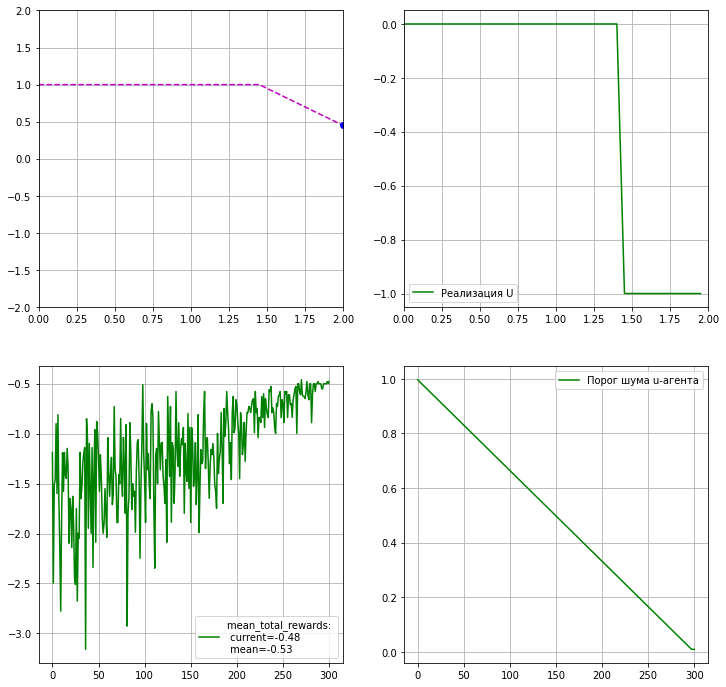

time: 50.390809297561646


In [4]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import numpy as np
import torch.nn as nn
import time
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
from Agents.DQN import DQN
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.Noises import DiscreteUniformNoise
from Agents.Utilities.ContinuousAgentMakers.ContinuousAgentMaker import ContinuousAgentMaker
from Agents.Utilities.Buffers.PrioritizedExperienceReplayBuffer import PrioritizedExperienceReplayBuffer
from Solvers import OneAgentSolver as solver 
%load_ext autoreload
%autoreload 2

#learning parameters
episode_n = 301

#environment initialization
env = SimpleControlProblem()
action_n = 3
action_values = np.linspace(env.action_min, env.action_max, action_n).reshape(action_n, 1)

#agent initialization
DQN = ContinuousAgentMaker(DQN)
q_model = SequentialNetwork([env.state_dim, 128, 64, action_n])
noise = DiscreteUniformNoise(action_n, threshold_decrease=1/episode_n)
memory = PrioritizedExperienceReplayBuffer()
agent = DQN(q_model, noise, action_values=action_values, q_model_lr=1e-3, gamma=1, batch_size=128, tau=1e-3, memory=memory)

#learning
visualizer = SimpleControlProblemVisualizer(waiting_for_show=50)

start_time = time.time()
solver.go(env, agent, episode_n=episode_n, show=visualizer.show)
print('time:', time.time() - start_time)